In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Diwali Sales Data.csv",encoding='unicode_escape')

# Data cleaning

### see the rows and columns 

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### drop unrelated/blank columns

In [7]:
df.drop(["Status","unnamed1"],axis=1,inplace=True) # use inplace to save the data after drop columns 

### check for null values

In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

### Drop null value

In [9]:
df.dropna(inplace=True)

### change data type

In [10]:
df["Amount"] = df["Amount"].astype(int)

In [11]:
df['Marital_Status'] = df['Marital_Status'].replace({0: 'Married', 1: 'Unmarried'})


In [12]:
df[:5]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,Unmarried,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,Unmarried,Gujarat,Western,Food Processing,Auto,2,23877


### rename column

In [13]:
df.rename(columns={'Marital_Status':"married"}).head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934


#### describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

In [14]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


### describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)

In [15]:
df[["Gender","Age Group"]].describe()

,Gender,Age Group
count,11239,11239
unique,2,7
top,F,26-35
freq,7832,4541


In [16]:
df["State"].unique()

array(['Maharashtra', 'Andhra\xa0Pradesh', 'Uttar Pradesh', 'Karnataka',
       'Gujarat', 'Himachal Pradesh', 'Delhi', 'Jharkhand', 'Kerala',
       'Haryana', 'Madhya Pradesh', 'Bihar', 'Rajasthan', 'Uttarakhand',
       'Telangana', 'Punjab'], dtype=object)

### count the unique value that gets from above shell

In [17]:
df["State"].nunique()

16

# Exploratory Data Analysis

## Gender¶

###  plotting a bar chart for Gender and it's count

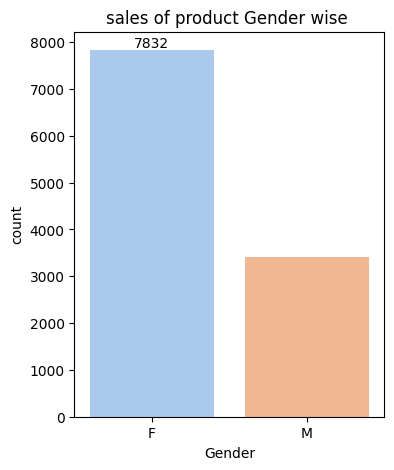

In [18]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x ="Gender",data=df, palette="pastel",hue= 'Gender')
plt.title("sales of product Gender wise ")
ax.bar_label(ax.containers[0])
plt.show()

### plotting a bar chart for gender vs total amount


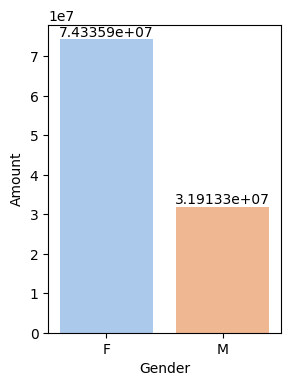

In [19]:
plt.figure(figsize=(3,4))
sales_gen = df.groupby(["Gender"],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False)
ax=sns.barplot(data = sales_gen,x='Gender',y='Amount',palette='pastel',hue='Gender')
for container in ax.containers:
    ax.bar_label(container)   
plt.show()

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## Age

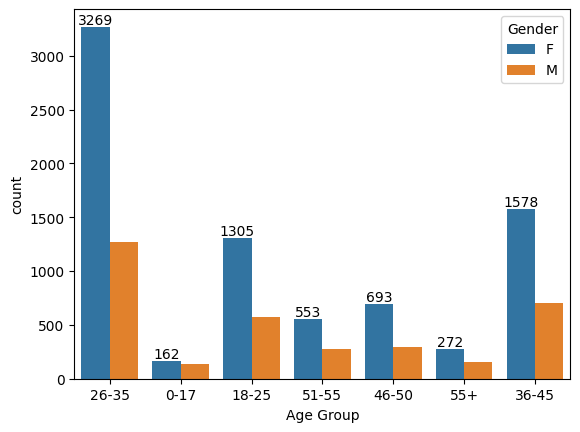

In [20]:
ax = sns.countplot(data=df,x="Age Group",hue='Gender')
ax.bar_label(ax.containers[0])
plt.show()

###  Total Amount vs Age Group

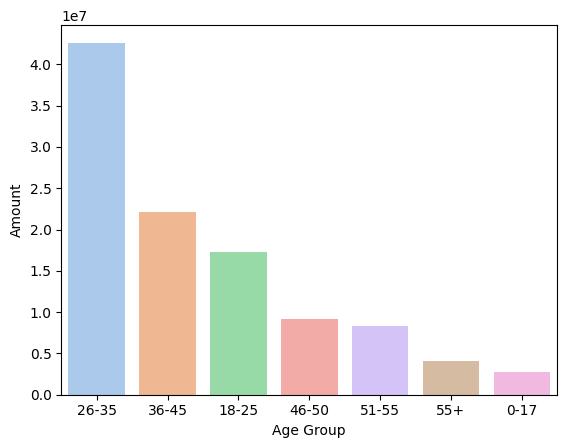

In [21]:
sales_age = df.groupby(["Age Group"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(data=sales_age,x="Age Group", y="Amount",palette="pastel",hue="Age Group")
plt.show()

### total number of orders from all states

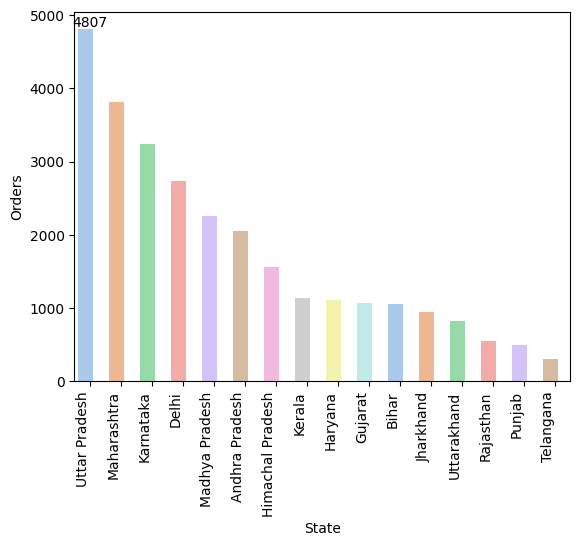

In [22]:
sales_state = df.groupby(["State"],as_index=False)["Orders"].sum().sort_values("Orders",ascending=False)
ax = sns.barplot(data=sales_state,x='State',y='Orders',palette='pastel',hue='State')
ax.bar_label(ax.containers[0])
sns.set(rc ={'figure.figsize':(20,4)})
# Reduce bar width
for bar in ax.patches:
    bar.set_width(0.5) 
# rotate the x axis lable name 
ax.set_xticks(range(len(sales_state)))
ax.set_xticklabels(sales_state["State"], rotation=90, ha="right")  # Add labels vertically
    
plt.show()


### total amount/sales from states

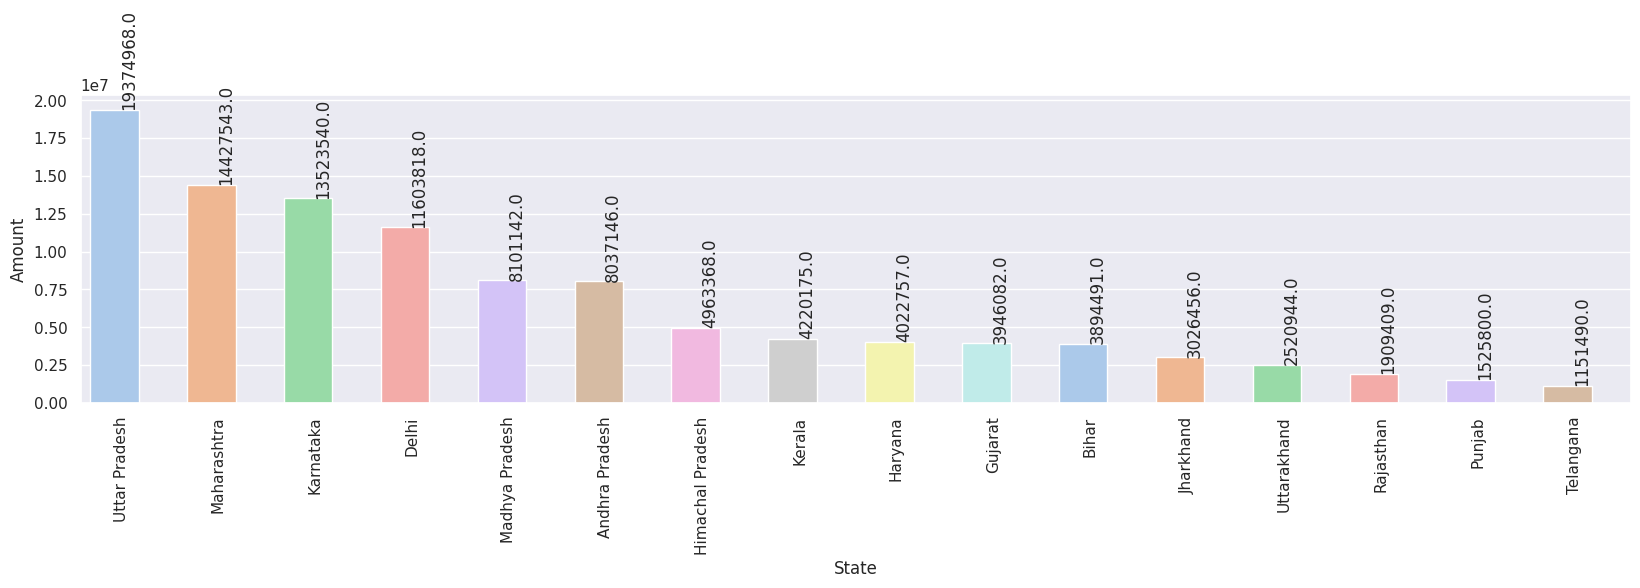

In [23]:
# Calculate the total "Amount" for each "State" and sort in descending order
amount = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)

# Create the bar plot
ax = sns.barplot(data=amount, x='State', y='Amount', palette='pastel', hue='State')

# Don't label the first container (commented out)
# ax.bar_label(ax.containers[0])

# Label the bars vertically
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        label_text = f'{bar.get_height()}'
        ax.text(bar.get_x() + bar.get_width() / 2, height, label_text, ha='center', va='bottom', rotation='vertical')

# Reduce bar width
for bar in ax.patches:
    bar.set_width(0.5)
sns.set(rc={'figure.figsize':(15,5)})
# Rotate the x-axis label names
ax.set_xticks(range(len(amount)))
ax.set_xticklabels(sales_state["State"], rotation=90, ha="right")

# Display the plot
plt.show()

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

## Marital Status

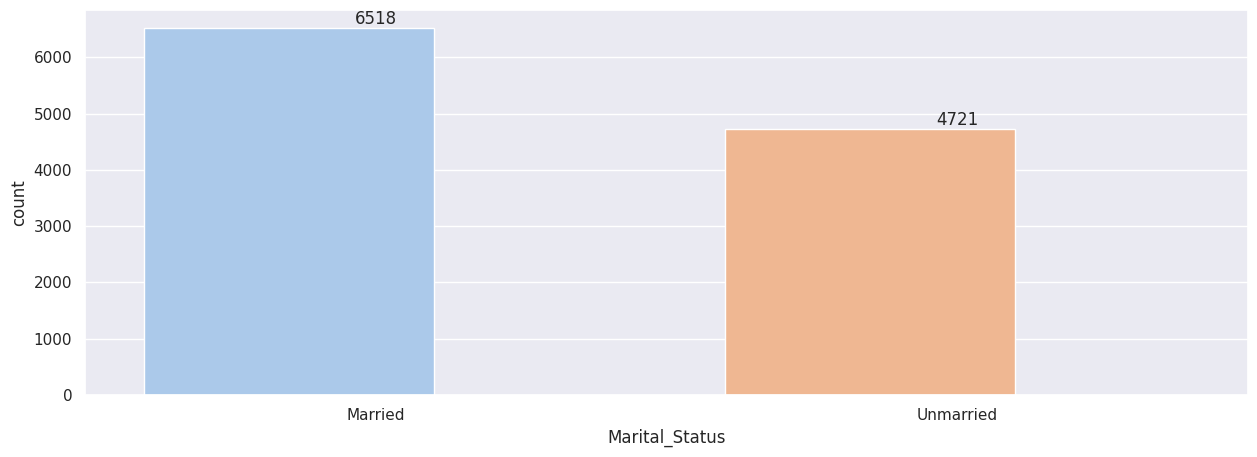

In [24]:
ax = sns.countplot(data=df,x='Marital_Status',palette='pastel',legend=False,hue='Marital_Status')
#ax.bar_label(ax.containers[0])
# Label the bars for all containers
for container in ax.containers:
    ax.bar_label(container)

for bar in ax.patches:
    bar.set_width(0.5)

### sales state acc to marital status of man and woman

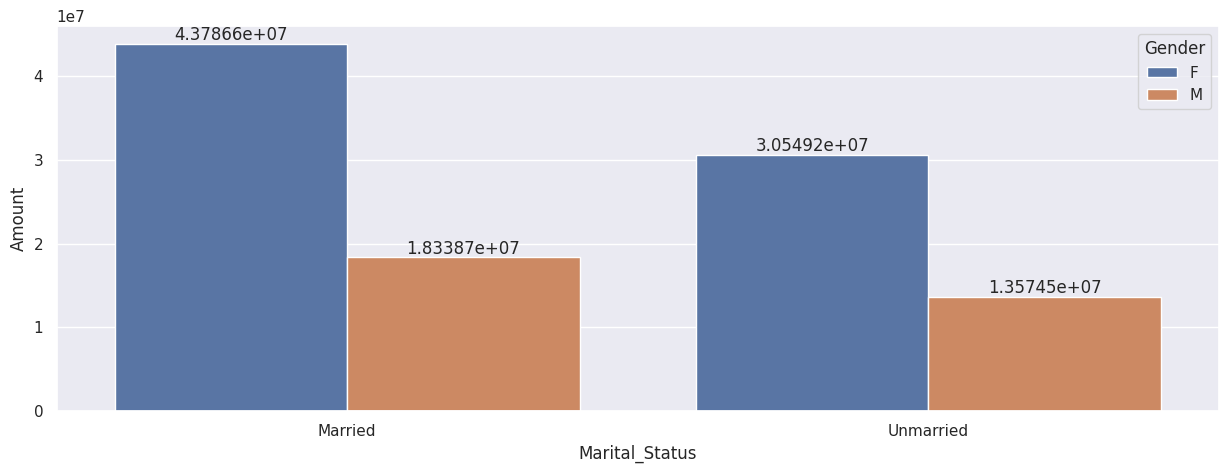

In [25]:
# Calculate total sales for each marital status and gender combination, sorted by total amount
sale_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
# Create the bar plot
ax = sns.barplot(data=sale_state, x='Marital_Status', y='Amount', hue='Gender')
# ax.bar_label(ax.containers[0])
# Iterate through each container (bar group) and label the bars within each group
for container in ax.containers: 
    ax.bar_label(container)

# Set bar width
for bar in ax.patches:
    bar.set_width(0.4)

# Set the figure size 
sns.set(rc={'figure.figsize':(4,4)})

# Display the plot
plt.show()

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

## Occupation¶

/tmp/ipykernel_541451/3871809452.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


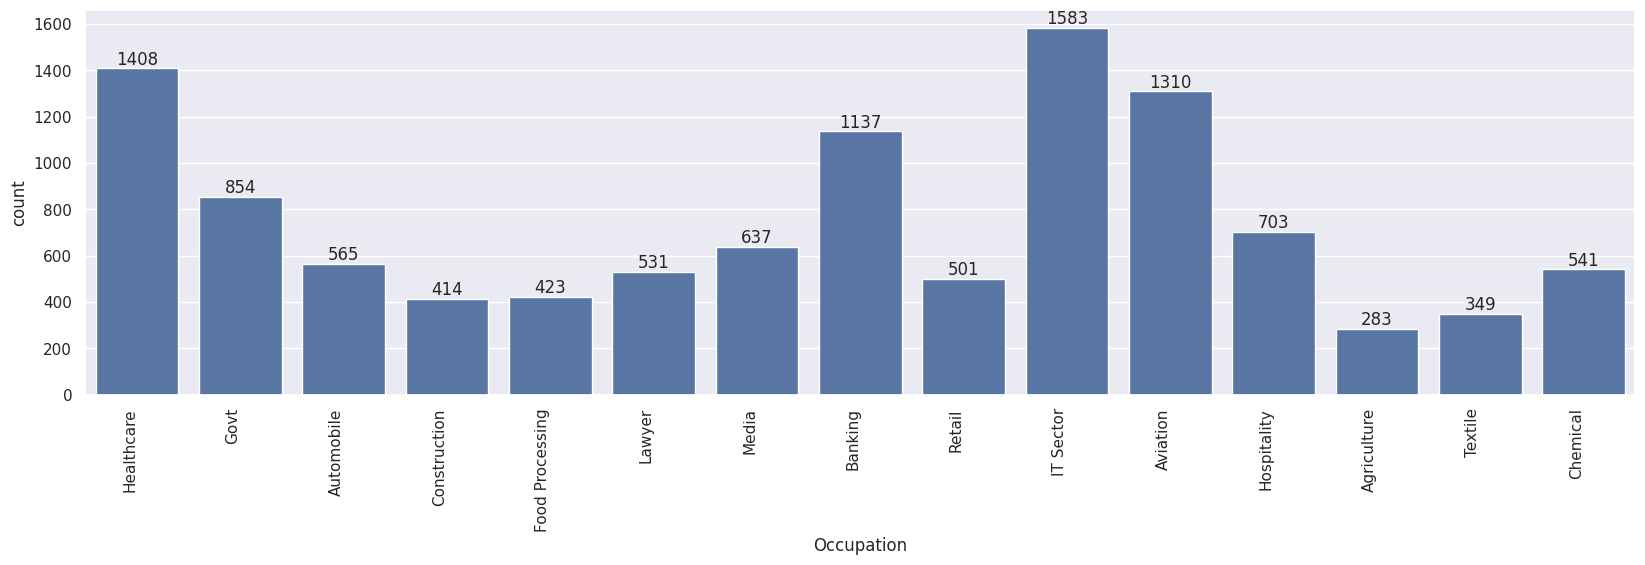

In [26]:
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(data=df,x='Occupation')
for container in ax.containers:
    ax.bar_label(container)
# rotate the x axis lable name 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right") 

plt.show()

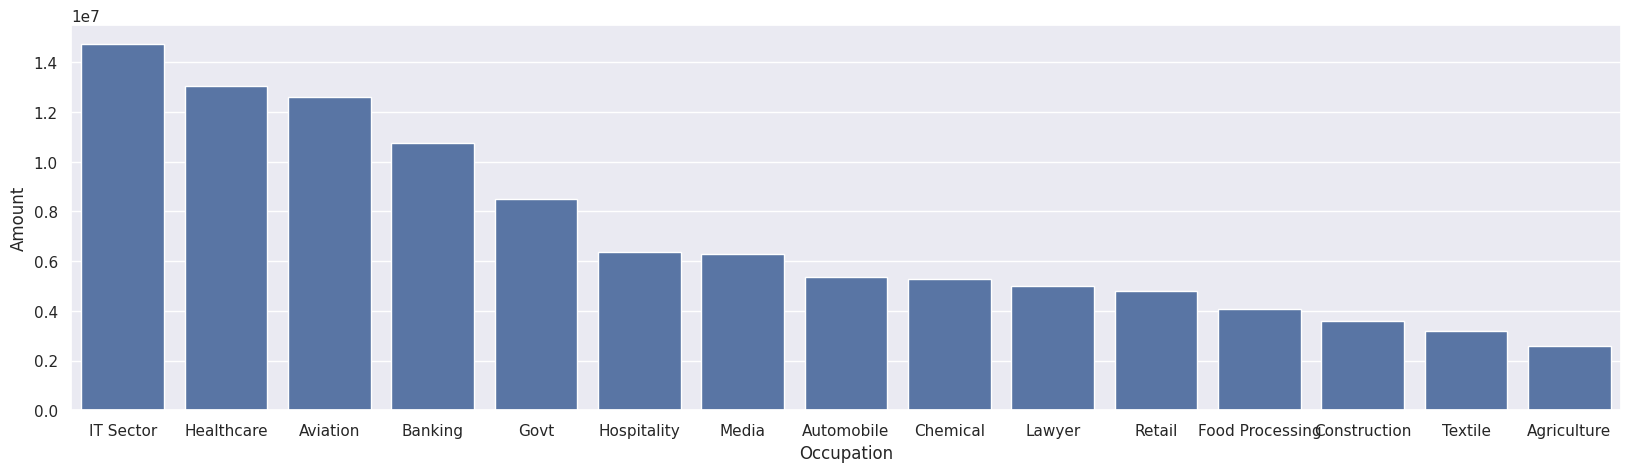

In [27]:
## Amount invested by differ 
sales_occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax = sns.barplot(data =sales_occupation,x='Occupation',y='Amount')
sns.set(rc={'figure.figsize':(20,5)})

## Product Category

/tmp/ipykernel_541451/1779065798.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,ha= 'right')


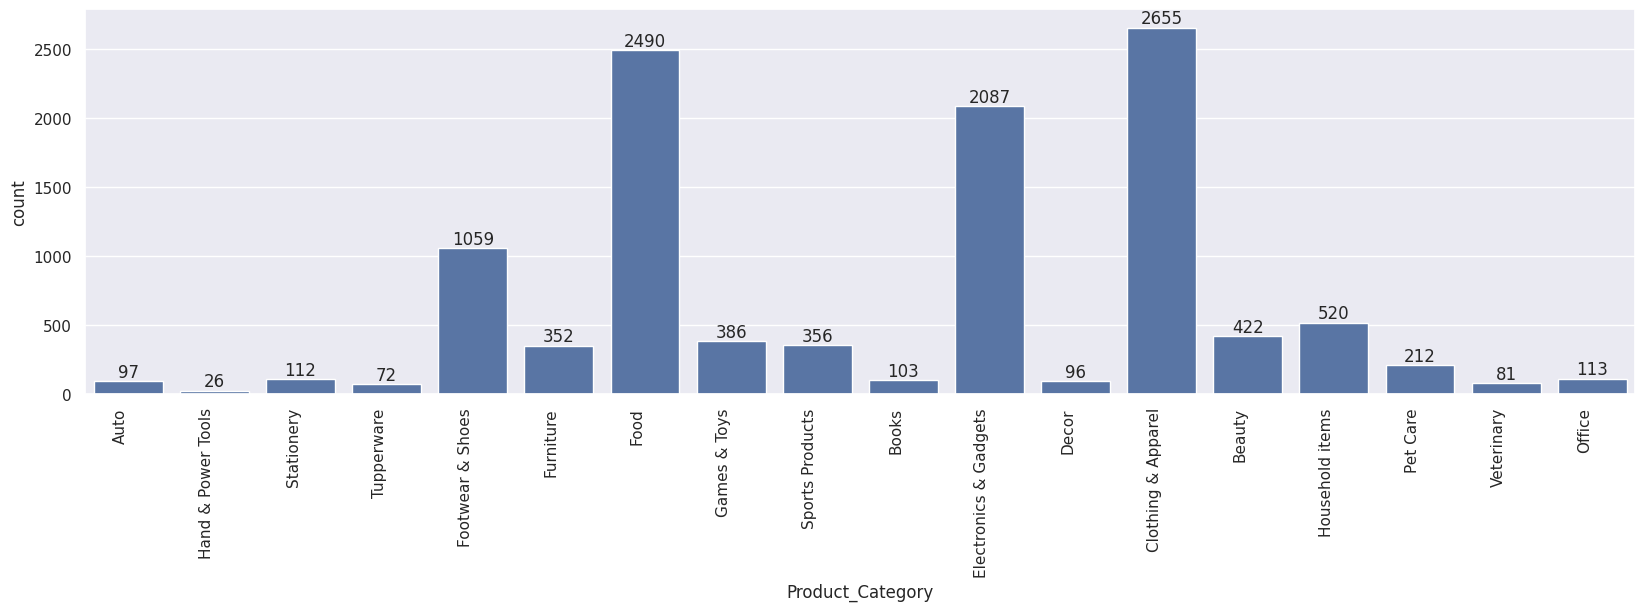

In [28]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,ha= 'right')
plt.show()

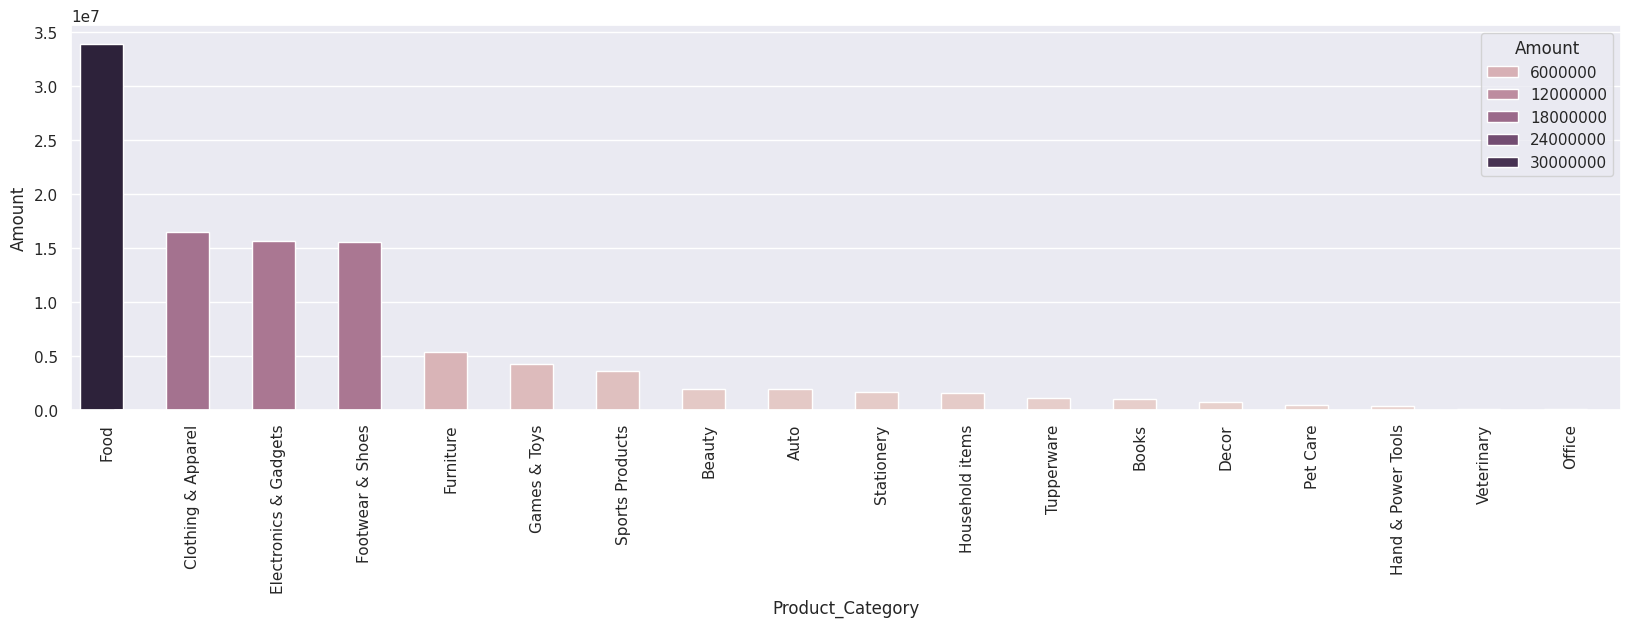

In [29]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
ax  = sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',hue='Amount')
for  bar in ax.patches:
    bar.set_width(0.5)
ax.set_xticks(range(len(sales_state)))
ax.set_xticklabels(sales_state["Product_Category"], rotation=90, ha="right") 
plt.show()

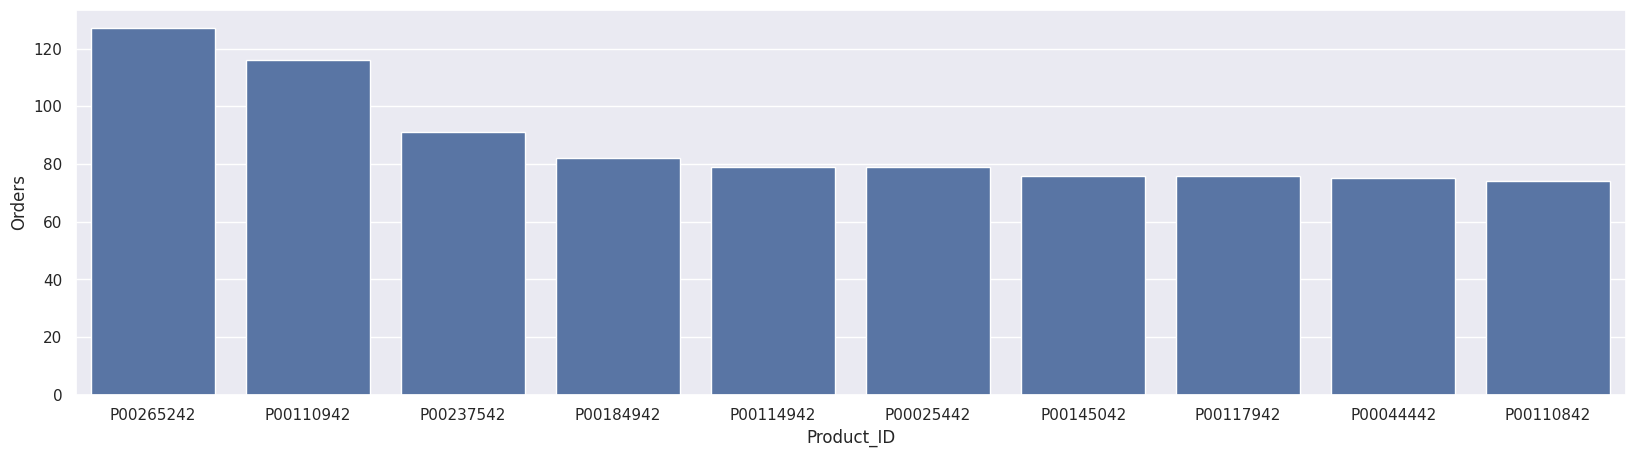

In [31]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')
plt.show()